In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
def display_img(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

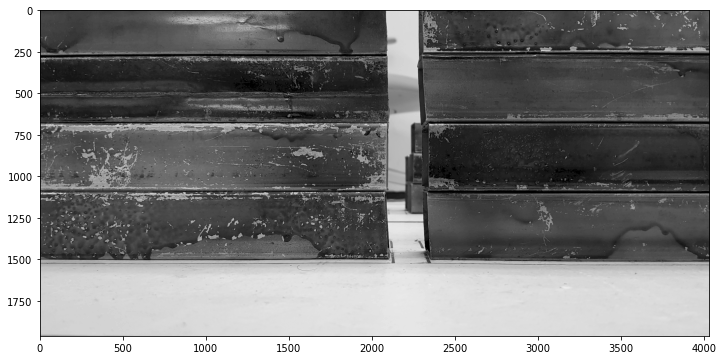

In [61]:
full = cv2.imread('PhotosLARC/oneHalfHorizontal.png',0)
display_img(full)

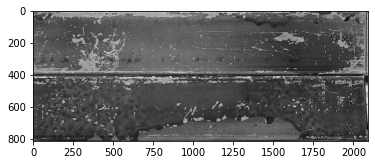

In [100]:
cut = cv2.imread('PhotosLARC/cutOneHalfHorizontal.png',0)
plt.imshow(cut,cmap='gray')

In [65]:
# Method 1: Brute force matching with ORB descriptors

In [67]:
orb = cv2.ORB_create()

In [69]:
# Calculate descriptors
kp1,des1 = orb.detectAndCompute(cut,None)
kp2,des2 = orb.detectAndCompute(full,None)

In [71]:
# Commanding Brute force method
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [73]:
matches = bf.match(des1,des2)

In [75]:
# The smaller the distance, the quality of the match increases
# Sort matches based on their distance
matches = sorted(matches, key=lambda x:x.distance)

In [77]:
# Only drawing the first 50 matches
stack_matches = cv2.drawMatches(cut, kp1, full, kp2, matches[:50],None, flags=2)

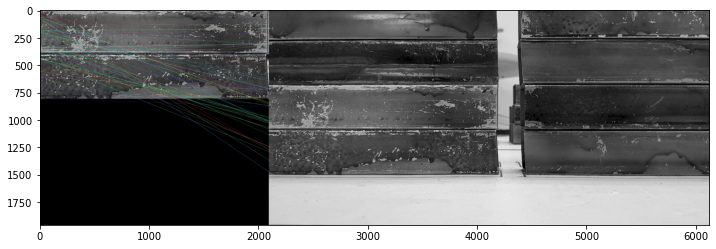

In [79]:
display_img(stack_matches)

In [101]:
# Method 2: Brute-Force Matching with SIFT Descriptors (accounts for != in size between target image and field image)
sift = cv2.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(cut, None)
kp2,des2 = sift.detectAndCompute(full, None)

In [102]:
bf = cv2.BFMatcher()

In [103]:
matches = bf.knnMatch(des1,des2,k=2)

In [104]:
goodMatches =[]
# Making a ratio test by comparing distance between descriptors (The smaller the better)
for match1, match2 in matches:
#     If match1 dis is < 75% match2 dist then we'll consider it a good match
    if match1.distance < 0.75*match2.distance:
        goodMatches.append([match1])

In [105]:
sift_matches = cv2.drawMatchesKnn(cut,kp1,full,kp2,goodMatches,None,flags=2)

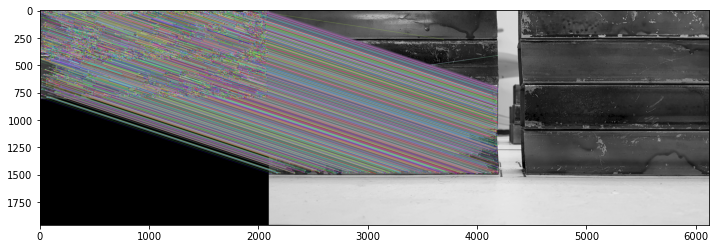

In [106]:
display_img(sift_matches)

In [116]:
# FLANN or Fast Library for Approximate Nearest Neighbors (faster than other algorithms but its less reliable)
sift = cv2.xfeatures2d.SIFT_create()

In [117]:
kp1,des1 = sift.detectAndCompute(cut, None)
kp2,des2 = sift.detectAndCompute(full, None)

In [118]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [119]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [120]:
matches = flann.knnMatch(des1,des2,k=2)
# Matches mask procedure is optional (is for customizing how the arrows will be drawn at the end)
matchesMask = [[0,0] for i in range(len(matches))]

In [125]:
# goodMatches = []
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
#         goodMatches.append([match1])
        matchesMask[i] = [1,0]
draw_params = dict(matchColor=(0,255,0), singlePointColor=(255,0,0), matchesMask=matchesMask,flags=0)

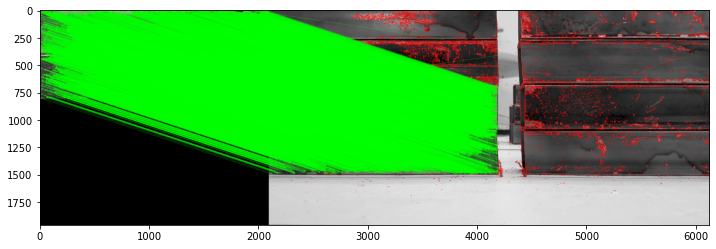

In [126]:
# flann_matches = cv2.drawMatchesKnn(cut,kp1,full,kp2,goodMatches,None,flags=0)
flann_matches = cv2.drawMatchesKnn(cut,kp1,full,kp2,matches,None,**draw_params)
display_img(flann_matches)